### SC、DBI和CH评价指标示例

______________________________________________________
init		time	inertia	SC	DBI	CH
k-means++	0.04s	633	0.396	0.802	24.216
random   	0.00s	553	0.355	0.774	29.696


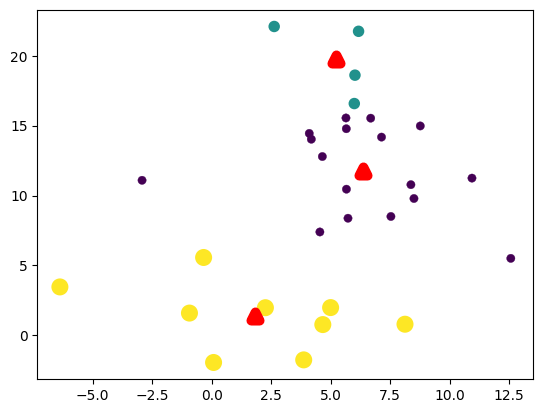

In [1]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

#np.random.seed(719) # 指定随机数种子，以确保每次运行可重复观察

samples = np.loadtxt("kmeansSamples.txt") # 加载数据集

print(54 * '_')
print('init\t\ttime\tinertia\tSC\tDBI\tCH') # 打印表头

n_init = 1 # 指定kmeans算法重复运行次数

estimator = KMeans(init='k-means++', n_clusters=3, n_init=n_init)  # k-means++方式指定初始簇中心
t0 = time() # 开始计时
estimator.fit(samples)
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f'
          % ('k-means++', (time() - t0), estimator.inertia_,
             metrics.silhouette_score(samples, estimator.labels_, metric='euclidean'),
             metrics.davies_bouldin_score(samples, estimator.labels_),
             metrics.calinski_harabasz_score(samples, estimator.labels_)))

estimator = KMeans(init='random', n_clusters=3, n_init=n_init) # 随机方式指定初始簇中心
t0 = time()
estimator.fit(samples)
print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f'
          % ('random', (time() - t0), estimator.inertia_,
             metrics.silhouette_score(samples, estimator.labels_, metric='euclidean'),
             metrics.davies_bouldin_score(samples, estimator.labels_),
             metrics.calinski_harabasz_score(samples, estimator.labels_)))

plt.scatter(samples[:,0],samples[:,1],c=estimator.labels_,linewidths=np.power(estimator.labels_+0.5, 2)) # 用不同大小的点来表示不同簇的点
plt.scatter(estimator.cluster_centers_[:,0],estimator.cluster_centers_[:,1],c='r',marker='^',linewidths=7) # 打印簇中心
plt.show()

### ZQ评价指标示例

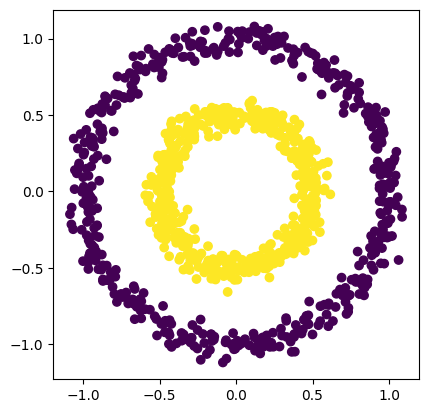

SC:	0.1132345379746796
DBI:	300.6033581127579
CH:	0.009910351299218752
ZQ:	0.09342900522589306


In [2]:
from zqscore import ZQ_score
from sklearn.datasets import make_circles
noisy_circles = make_circles(n_samples=1000, factor=.5, noise=.05, random_state=15)
X = noisy_circles[0]
plt.axes(aspect='equal')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=noisy_circles[1])
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X, noisy_circles[1], metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X, noisy_circles[1])))
print("CH:\t"+str(metrics.calinski_harabasz_score(X, noisy_circles[1])))
print("ZQ:\t"+str(ZQ_score(X, noisy_circles[1])))

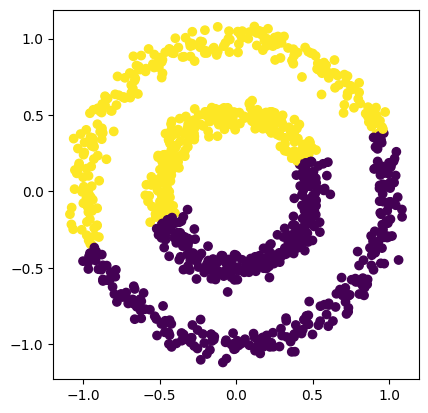

SC:	0.35189553348739855
DBI:	1.1868377015845868
CH:	569.9680558643048
ZQ:	1.2076303796478502


In [3]:
clus = KMeans(n_clusters=2, random_state=0).fit(X)
plt.axes(aspect='equal')
plt.scatter(X[:, 0], X[:, 1], marker='o', c=clus.labels_)
plt.show()
print("SC:\t"+str(metrics.silhouette_score(X, clus.labels_, metric='euclidean')))
print("DBI:\t"+str(metrics.davies_bouldin_score(X, clus.labels_)))
print("CH:\t"+str(metrics.calinski_harabasz_score(X, clus.labels_)))
print("ZQ:\t"+str(ZQ_score(X, clus.labels_)))